In [1]:
import numpy as np
import pandas as pd
import imageio
import h5py
import pickle

from tqdm import tqdm
from xqdm import xqdm
from pathlib import Path
import matplotlib.pyplot as plt
import re

In [4]:
with open('data/interpolation_xy.pkl', 'rb') as f:
    data = pickle.load(f)
    # data["dataset no"]["x=0 or y=1"]["column"]["index"]

In [38]:
cols = ('input_orientation_yaw', 'input_orientation_pitch', 'input_orientation_roll')
X, Y = np.array(data[0][0][cols[0]]), np.array(data[0][1][cols[0]])

Text(0.5, 1.0, 'target data Y')

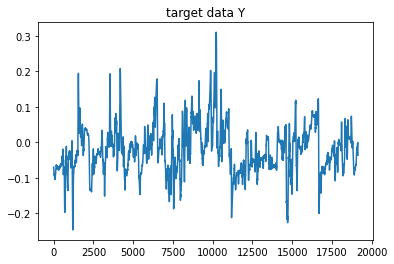

In [69]:
plt.plot(Y)
plt.title('target data Y')

In [72]:
errors = [[], [], []]

for i in range(len(data)):
    print(f'\n========================== data {i:02d} ==========================')
    for j, c in enumerate(cols):
        X, Y = np.array(data[i][0][c]), np.array(data[i][1][c])
        X = X[:-12]
        Y = Y[12:]
        diff_square = np.square(Y - X)
        error = np.percentile(diff_square, 99)
        errors[j].append(error)
        print(c, 'rms 99% error\t:', error)


========================== data 00 ==========================
input_orientation_yaw rms 99% error	: 0.007028780470886841
input_orientation_pitch rms 99% error	: 0.008435467880036443
input_orientation_roll rms 99% error	: 0.0006322361386101084

========================== data 01 ==========================
input_orientation_yaw rms 99% error	: 0.04979150130894096
input_orientation_pitch rms 99% error	: 0.00535347783321851
input_orientation_roll rms 99% error	: 0.001544200880967181

========================== data 02 ==========================
input_orientation_yaw rms 99% error	: 0.05490465341738711
input_orientation_pitch rms 99% error	: 0.003051095884247426
input_orientation_roll rms 99% error	: 0.000912684426120482

========================== data 03 ==========================
input_orientation_yaw rms 99% error	: 0.4638981100839229
input_orientation_pitch rms 99% error	: 0.08559601783782489
input_orientation_roll rms 99% error	: 0.021130658443992808

========================== data 

In [73]:
np.mean(errors[0]), np.mean(errors[1]), np.mean(errors[2])

(0.18396673123124033, 0.04599868970310874, 0.009655009000294165)